In [ ]:
!pip install hdbscan --upgrade

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
%matplotlib inline

### Let's run DBSCAN on two different sets of randomly generated data and see how it performs.

### Dataset 1: Multivariate Normal data.

In [2]:
np.random.seed(2552277) # ALLCAPS on a phone

In [3]:
x1 = np.random.normal(25, 10, 100) # 100 obs, mean of 25, std of 10
x2 = np.random.normal(500, 250, 100) # 100 obs, mean of 500, std of 250

In [4]:
df = pd.DataFrame()

df = df.from_dict({'x1': x1,
                   'x2': x2})

In [5]:
df.head()

,x1,x2
0,29.873105,279.510514
1,-4.831721,598.467601
2,15.748658,933.096220
3,33.994563,456.915929
4,17.935249,76.080956


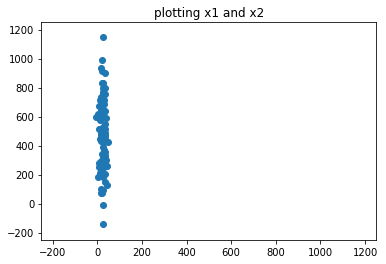

In [6]:
plt.title('plotting x1 and x2')
plt.xlim(-250, 1250)
plt.ylim(-250, 1250)
plt.scatter(df['x1'], df['x2']);

In [7]:
df = pd.DataFrame(StandardScaler().fit_transform(df), columns = ['x1', 'x2'])

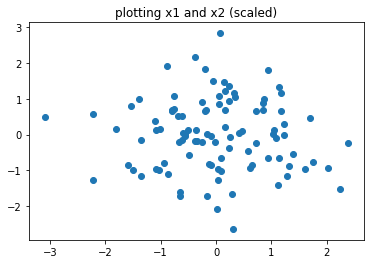

In [10]:
plt.title('plotting x1 and x2 (scaled)')
plt.scatter(df['x1'], df['x2']);

#### Let's fit DBSCAN on our data with `eps = 0.5` and `min_samples = 5`. (Note: This is the default in `sklearn`!)

In [11]:
cluster = DBSCAN(eps = 0.5,
                 min_samples = 5)

In [12]:
cluster.fit(df)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [13]:
labels = cluster.labels_
print(labels)

[ 0 -1 -1  0  2  0  0  0  0  0  0  0  0 -1  0  0  0  0  2  0 -1  0  0  0
  0  0  0  0  1  0  0  0  0  1  0  0  0  1 -1  0  0  0  0  0  0  0  0  0
  0  0 -1  2 -1  0  0  0  0  1  0  1  0  0  0 -1  2  0  0  0  0  0 -1  0
  0 -1  0  0 -1  0 -1  0  0  0  0  0  0  0  1  0  0  0  0  0 -1  0  0 -1
  0  0  1 -1]


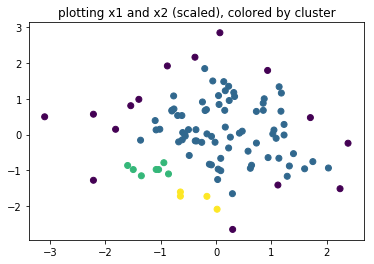

In [14]:
plt.title('plotting x1 and x2 (scaled), colored by cluster')
plt.scatter(df['x1'], df['x2'], c = cluster.labels_);

In [20]:
print('Silhouette Coef: %0.6f' % metrics.silhouette_score(df, labels))

Silhouette Coef: 0.145687


#### Go ahead and fit DBSCAN on our data with `eps = 1` and `min_samples = 5`.

In [21]:
cluster = DBSCAN(eps = 1.0,
                 min_samples = 5)

In [22]:
cluster.fit(df)

DBSCAN(algorithm='auto', eps=1.0, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [23]:
labels = cluster.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


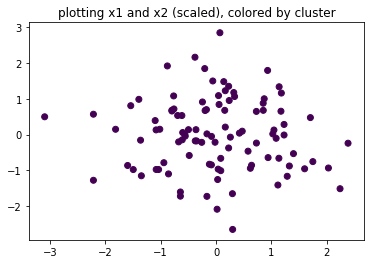

In [24]:
plt.title('plotting x1 and x2 (scaled), colored by cluster')
plt.scatter(df['x1'], df['x2'], c = cluster.labels_);

#### Let's try DBSCAN on our data with `eps = 1` and `min_samples = 20`.

In [28]:
cluster = DBSCAN(eps = 1.0,
                 min_samples = 20)

In [29]:
cluster.fit(df)

DBSCAN(algorithm='auto', eps=1.0, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=20, n_jobs=1, p=None)

In [30]:
labels = cluster.labels_
print(labels)

[ 0 -1  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0 -1]


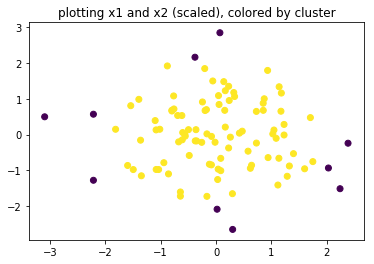

In [31]:
plt.title('plotting x1 and x2 (scaled), colored by cluster')
plt.scatter(df['x1'], df['x2'], c = cluster.labels_);

In [32]:
print('Silhouette Coef: %0.6f' % metrics.silhouette_score(df, labels))

Silhouette Coef: 0.350140


### Dataset 2: Smiley/Frowny

In [33]:
x1_1 = np.random.uniform(0, 50, 100)

x1_2 = np.random.uniform(60, 110, 100)

x2_1 = (x1_1 - 25)  ** 2 + np.random.normal(0, 10, 1)

x2_2 = -1 * (x1_2 - 85) ** 2 + np.random.normal(0, 10, 1)

In [34]:
x1 = np.append(x1_1, x1_2)
    
x2 = np.append(x2_1, x2_2)

In [35]:
df = pd.DataFrame()

df = df.from_dict({'x1': x1,
                   'x2': x2})

In [36]:
df = pd.DataFrame(StandardScaler().fit_transform(df), columns=['x1', 'x2'])

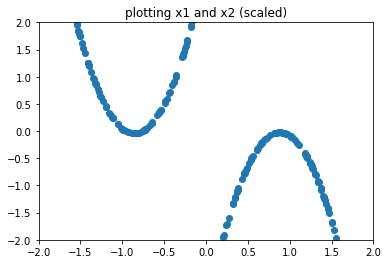

In [38]:
plt.title('plotting x1 and x2 (scaled)')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.scatter(df['x1'], df['x2']);

#### Let's try DBSCAN on our data with `eps = 0.2` and `min_samples = 5`.

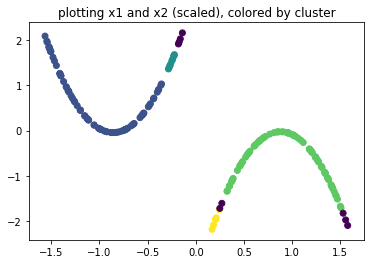

In [39]:
cluster = DBSCAN(eps = 0.2,
                 min_samples = 5)

cluster.fit(df)

labels = cluster.labels_

plt.title('plotting x1 and x2 (scaled), colored by cluster')
plt.scatter(df['x1'], df['x2'], c = cluster.labels_);

In [40]:
print('Silhouette Coef: %0.6f' % metrics.silhouette_score(df, labels))

Silhouette Coef: 0.390082


#### By only tweaking `epsilon`, can you get the above to return exactly two clusters? (The two clusters we would expect?)

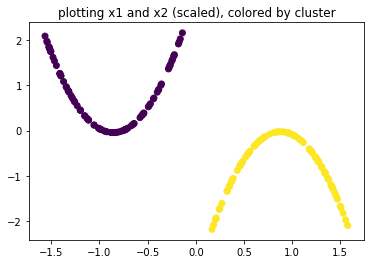

In [41]:
cluster = DBSCAN(eps = 1.0,
                 min_samples = 5)

cluster.fit(df)

labels = cluster.labels_

plt.title('plotting x1 and x2 (scaled), colored by cluster')
plt.scatter(df['x1'], df['x2'], c = cluster.labels_);

In [42]:
print('Silhouette Coef: %0.6f' % metrics.silhouette_score(df, labels))

Silhouette Coef: 0.617735


#### By only tweaking `min_samples`, can you get the above to return exactly two clusters? (The two clusters we would expect?) Be sure to reset `eps` to `0.2`.

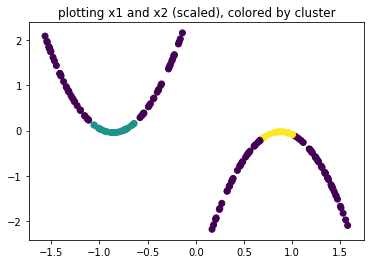

In [54]:
cluster = DBSCAN(eps = 0.2,
                 min_samples = 20)

cluster.fit(df)

labels = cluster.labels_

plt.title('plotting x1 and x2 (scaled), colored by cluster')
plt.scatter(df['x1'], df['x2'], c = cluster.labels_);

In [57]:
for i in range(0, 200):
    cluster = DBSCAN(eps = 0.2,
                     min_samples = i)
    cluster.fit(df)
    labels = cluster.labels_
    if len(set(labels)) == 2 and -1 not in labels:
        print('Minimum samples ought to be', str(i))
        break

### Let's try HDBSCAN on this data!

In [58]:
import hdbscan

In [59]:
h_cluster = hdbscan.HDBSCAN(min_cluster_size = 5, # analogous to min_points
                            gen_min_span_tree = True) # saves the "dendrogram"

In [61]:
h_cluster.fit(df)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
    prediction_data=False)

In [62]:
labels = h_cluster.labels_

In [63]:
print(labels)

[14  2 -1  6 -1 14 -1 -1 -1  2 -1 14  2  8  2 -1  6  8 14 13  0  2  0 14
 14 14  0 14  0 14  6 14 -1  2 -1 14 -1 14 -1  0 -1  0  6 14 14 13  2  2
 14 14  8 -1 14 -1  8  6  8 14 14  6  6 -1 13 -1 -1 -1 -1 -1 14 14 -1  2
 -1 14  2 -1  0 14 13 -1 14  2  0  6 -1  2 14 13 14  0 -1 14 -1 14 14 13
  8 14  0  0 -1 12 11  3  3 12 12 11 11 -1 -1  9  1  3  4 10 -1  5  4 10
 11 -1  5 12 12 12 11 10 10  7 11 11 -1 12  5 -1 10 -1  3 -1  9  7 -1  9
 -1  1 12 -1  9 -1 12 11  4 12 -1  4  5  9 12 12 12  1 12  5 -1 12  5  3
  5  7  4 -1 -1 -1  4  1 -1  9  7 -1 10 12  3 -1  7  9  4  7 12 -1  1  3
  7  7 12  1 -1 12 -1 -1]


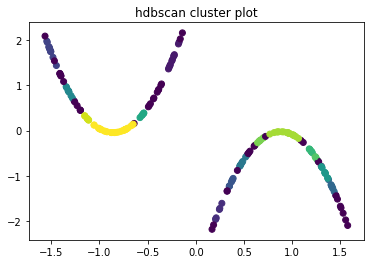

In [64]:
plt.title('hdbscan cluster plot')
plt.scatter(df['x1'], df['x2'], c=labels);

Recall that our learning objectives were to:
- Describe the effect of epsilon and min_points on DBSCAN.
- Implement DBSCAN.
- Identify advantages and disadvantages of DBSCAN.
- Explain and implement HDBSCAN.

<details>
<summary>Describe the effect of epsilon and min_points on DBSCAN.</summary>
```
- epsilon is a hyperparameter of DBSCAN that refers to how far we will "search" from a point to see if other points should be clustered with that point. As epsilon increases, we search farther and expect to include more points in a cluster.
- min_points is a hyperparameter of DBSCAN that refers to how many points are needed for a group to officially be called a "cluster."
- As min_points increases, we expect the number of clusters will decrease and the number of outliers will increase.
```
</details>

<br>

<details>
<summary>Identify advantages of DBSCAN.</summary>
```
- DBSCAN detects clusters that are more dense than outliers.
- DBSCAN can detect concave or irregularly-shaped clusters, whereas most other clustering algorithms cannot (easily) do the same.
- DBSCAN doesn't classify all points, meaning we can use DBSCAN for outlier detection. (The same is not true of hierarchical or k-means clustering.)
- DBSCAN does not need us to pre-identify the number of clusters.
- DBSCAN is generally quite fast.
```
</details>

<br>

<details>
<summary>Identify disadvantages of DBSCAN.</summary>
```
- DBSCAN requires two hyperparameters to tune. This can be difficult, especially in cases where there are not labels to define metrics to "gridsearch" over.
    - The value of epsilon you choose to search is highly dependent on how you scale your variables.
    - To define an appropriate min_samples, you may need a subject-matter expert.
```
</details>

<br>

<details>
<summary>Explain HDBSCAN.</summary>
```
- HDBSCAN requires only one hyperparameter to tune: the minimum number of points you need to define a cluster.
- HDBSCAN calculates, for each point, the epsilon searching distance needed to meet the minimum number of points. The algorithm then constructs a dendrogram using epsilon as the distance between clusters and prunes any clusters that don't meet the minimum points threshold.
```
</details>